# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [2]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [3]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]


In [4]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)


## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

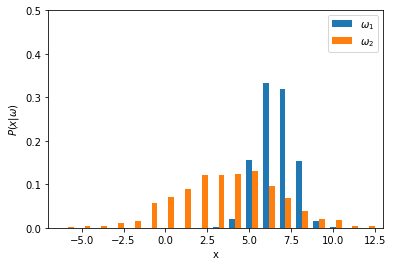

In [5]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()


In [9]:
# TODO
# compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
C, N = test_x.shape
t = likelihood(train_x)
a = np.arange(0,N)
b = np.argmin(t,axis=0)
r = test_x[b,a]
print(np.sum(r),np.sum(r)/test_x.sum())

# end answer


64.0 0.21333333333333335


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

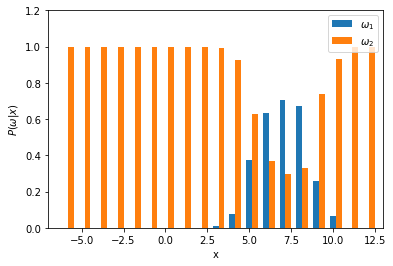

In [11]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()


In [12]:
# TODO
# compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
C, N = test_x.shape
p=posterior(train_x)
a = np.arange(0,N)
b = np.argmin(p,axis=0)
r = test_x[b,a]
print(np.sum(r),np.sum(r)/test_x.sum())

# end answer


47.0 0.15666666666666668


## Part 3 risk


In [55]:
risk = np.array([[0, 1], [2, 0]])
# TODO
# get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
p=posterior(train_x)
x=np.sum(train_x,axis=0)
x=x/np.sum(x)
r=np.dot(risk,p).min(0)
#print(r)
print(np.dot(r,x))

# end answer


0.24749999999999997
